In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import scipy.stats as stats

import gmaps

# Google developer API key
from Config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# File to load 
Los_Angeles_df = "LA_Crime_Data.csv"

In [3]:
# Read the Los Angeles city crime data

Los_Angeles_df = pd.read_csv(Los_Angeles_df)

# Display the data table for preview
Los_Angeles_df.head()

,Date Occurred,LocationLat,LocationLong
0,7/15/2018,34.0547,-118.2505
1,7/14/2018,34.0516,-118.2561
2,7/14/2018,34.0663,-118.2441
3,5/19/2018,34.0472,-118.2351
4,7/14/2018,34.0510,-118.2480


In [4]:
Los_Angeles_df.dtypes

Date Occurred     object
LocationLat      float64
LocationLong     float64
dtype: object

In [5]:
Los_Angeles_df["Date Occurred"]=Los_Angeles_df["Date Occurred"].astype("datetime64")

In [6]:
Los_Angeles_df.head()

,Date Occurred,LocationLat,LocationLong
0,2018-07-15,34.0547,-118.2505
1,2018-07-14,34.0516,-118.2561
2,2018-07-14,34.0663,-118.2441
3,2018-05-19,34.0472,-118.2351
4,2018-07-14,34.0510,-118.2480


In [7]:
Los_Angeles_df_winter=len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-01-01")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-03-20")) |
                                             (Los_Angeles_df["Date Occurred"]>="2018-12-21")])

print(Los_Angeles_df_winter)                                              

54474


In [8]:
Los_Angeles_df_spring=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-03-21")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-06-20")])
print(Los_Angeles_df_spring)

58342


In [9]:
Los_Angeles_df_summer=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-06-21")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-09-21")])
print(Los_Angeles_df_summer)

58052


In [10]:
Los_Angeles_df_fall=len(Los_Angeles_df.loc[(Los_Angeles_df["Date Occurred"]>= "2018-09-22")& 
                                            (Los_Angeles_df["Date Occurred"] <="2018-12-20")])
print(Los_Angeles_df_fall)

55194


In [11]:
print(f"Winter: {Los_Angeles_df_winter}")
print(f"Spring: {Los_Angeles_df_spring}")
print(f"Summer: {Los_Angeles_df_summer}")
print(f"Fall: {Los_Angeles_df_fall}")

Winter: 54474
Spring: 58342
Summer: 58052
Fall: 55194


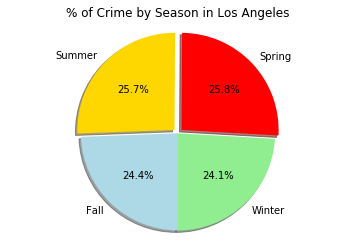

In [12]:
# Build Pie Chart
Seasons = ["Winter", "Spring", "Summer", "Fall"]
Crime = [Los_Angeles_df_winter, Los_Angeles_df_spring, Los_Angeles_df_summer, Los_Angeles_df_fall ]
colors = ["lightgreen", "red", "gold", "lightblue"]
explode = [0,0.05,0.05,0]
plt.pie(Crime, explode=explode, labels=Seasons, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("% of Crime by Season in Los Angeles")
# Save Figure
plt.savefig("LACrimebySeason.png")
# Show Figure
plt.show()


In [13]:
#Chi^2 
observed = pd.Series([54474,58342,58052,55194], index=["Winter", "Spring", "Summer", "Fall"])

In [14]:
# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = 56516

# Rename columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
Winter,54474,56516
Spring,58342,56516
Summer,58052,56516
Fall,55194,56516


In [15]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [16]:
# The critical value
critical_value

7.814727903251179

In [17]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=205.4465991931488, pvalue=2.806894212014122e-44)

# Conclusion: since the chi square value of 205.45 exceeds the critical value of 7.81, we conclude that the results are statistically significant.

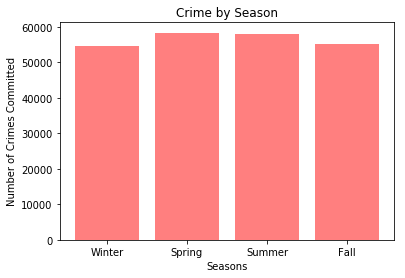

In [18]:
#Build bar and line chat
#show crime by season and high and low temp by season 
#x-axis is for seasons 
Crimes = [54474,58342,58052,55194]
x_axis = np.arange(len(Crimes))

#y-axis is for crimes committed
plt.bar(x_axis, Crimes, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
Crimes = [value for value in x_axis]
plt.xticks(Crimes, ["Winter", "Spring", "Summer", "Fall"])

# Give our chart some labels and a tile
plt.title("Crime by Season")
plt.xlabel("Seasons")
plt.ylabel("Number of Crimes Committed")

# Save Figure
plt.savefig("CrimebyseasonBar.png")
# Show Figure
plt.show()

In [19]:
LA_jan = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-01-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-01-31"))])
print(LA_jan)

19083


In [20]:
LA_feb = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-02-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-02-28"))])
print(LA_feb)

17002


In [21]:
LA_mar = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-03-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-03-31"))])
print(LA_mar)

18882


In [22]:
LA_apr = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-04-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-04-30"))])
print(LA_apr)

18948


In [23]:
LA_may = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-05-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-05-31"))])
print(LA_may)

19756


In [24]:
LA_jun = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-06-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-06-30"))])
print(LA_jun)

19035


In [25]:
LA_jul = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-07-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-07-31"))])
print(LA_jul)

19644


In [26]:
LA_aug = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-08-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-08-31"))])
print(LA_aug)

19433


In [27]:
LA_sep = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-09-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-09-30"))])
print(LA_sep)

18215


In [28]:
LA_oct = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-10-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-10-31"))])
print(LA_oct)

19215


In [29]:
LA_nov = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-11-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-11-30"))])
print(LA_feb)

17002


In [30]:
LA_dec = len(Los_Angeles_df.loc[((Los_Angeles_df["Date Occurred"]>= "2018-12-01")&
                              (Los_Angeles_df["Date Occurred"] <= "2018-12-31"))])
print(LA_dec)

18532


In [31]:
# Read the Los Angeles city temperature data
LATemp_df = "LATemp.csv"
LATemp_df = pd.read_csv(LATemp_df)

# Display the data table for preview
LATemp_df.head(12)

,Month,Highest Temperature,Lowest Temperature
0,January,70,52
1,February,73,55
2,March,70,52
3,April,73,55
4,May,75,58
5,June,79,62
6,July,83,65
7,August,84,66
8,September,83,65
9,October,79,60


In [32]:
#Build bar and line chart
#show crime by season and high and low temp by season
#x-axis is for seasons
Crimes = [LA_jan, LA_feb, LA_mar, 
          LA_apr, LA_may, LA_jun, 
          LA_jul, LA_aug, LA_sep, 
          LA_oct, LA_nov, LA_dec]

x_axis = ["Jan", "Feb", "Mar", 
          "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", 
          "Oct", "Nov", "Dec"]

In [33]:
LATemp_df.columns

Index(['Month', 'Highest Temperature ', 'Lowest Temperature '], dtype='object')

In [34]:
m1_t = pd.DataFrame({
 'Number of Crimes' : [LA_jan, LA_feb, LA_mar, 
          LA_apr, LA_may, LA_jun, 
          LA_jul, LA_aug, LA_sep, 
          LA_oct, LA_nov, LA_dec],
 'Highs' : LATemp_df['Highest Temperature '],
 'Lows' : LATemp_df['Lowest Temperature ']})

m1_t.head(12)

,Number of Crimes,Highs,Lows
0,19083,70,52
1,17002,73,55
2,18882,70,52
3,18948,73,55
4,19756,75,58
5,19035,79,62
6,19644,83,65
7,19433,84,66
8,18215,83,65
9,19215,79,60


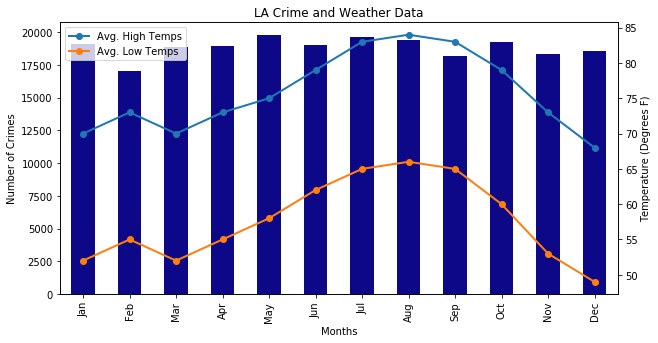

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize= (10, 5))
ax = m1_t['Number of Crimes'].plot(kind='bar', use_index=True, colormap="plasma")

plt.ylabel("Number of Crimes")
plt.xlabel("Months")
plt.title("LA Crime and Weather Data")

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         m1_t[['Highs','Lows']].values,
         linestyle='-',
         marker='o', linewidth=2.0)
ax.set_xticklabels(tuple(x_axis))
plt.legend(("Avg. High Temps", "Avg. Low Temps"), loc="upper left")
plt.ylabel("Temperature (Degrees F)")
plt.show()
# Save Figure
plt.savefig("LACrimeandWeather.png")

In [36]:
Los_Angeles_df.isna().sum()

Date Occurred    0
LocationLat      0
LocationLong     0
dtype: int64

In [37]:
LA_clean = Los_Angeles_df.dropna(how='any')
LA_clean.head()

,Date Occurred,LocationLat,LocationLong
0,2018-07-15,34.0547,-118.2505
1,2018-07-14,34.0516,-118.2561
2,2018-07-14,34.0663,-118.2441
3,2018-05-19,34.0472,-118.2351
4,2018-07-14,34.0510,-118.2480


In [38]:
Los_Angeles_df["Month"] = Los_Angeles_df["Date Occurred"].dt.month

In [39]:
Los_Angeles_df.sample(10)

,Date Occurred,LocationLat,LocationLong,Month
55892,2018-03-30,34.1016,-118.3267,3
163052,2018-04-25,34.2497,-118.2804,4
210720,2018-03-18,34.1938,-118.5797,3
64412,2018-01-17,34.0478,-118.3459,1
2887,2018-02-26,34.0382,-118.2665,2
201409,2018-04-25,34.0654,-118.3016,4
224516,2018-10-10,33.9783,-118.2838,10
50425,2018-09-13,33.8303,-118.3016,9
28317,2018-06-24,34.0274,-118.2867,6
176134,2018-11-30,34.2751,-118.5652,11


In [40]:
Los_Angeles_df.columns

Index(['Date Occurred', 'LocationLat', 'LocationLong', 'Month'], dtype='object')

In [41]:
# Store latitude and longitude in locations
locations = LA_clean[["LocationLat", "LocationLong"]]


In [43]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True, max_intensity=10, point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))